In [1]:
!pip install graphviz

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

In [61]:
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

print(font_family)

Malgun Gothic


In [63]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

## 2.3.4 나이브 베이즈 분류기

나이브 베이즈 분류기는 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만 그 대신 일반화 성능이 조금 뒤집니다. 나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문입니다.

나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지입니다.

In [3]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label] = X[y == label].sum(axis=0)
    
print("특성 카운트:\n", counts)


특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## 2.3.5 결정 트리

결정트리는 분류와 회귀 문제에 널리 사용하는 모델입니다. 

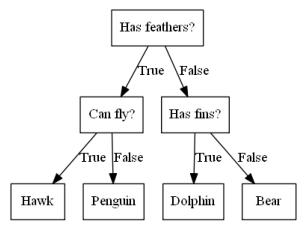

In [4]:
mglearn.plots.plot_animal_tree()

### 결정 트리 만들기

결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻입니다. 머신러닝에서는 이런 질문들을 테스트라고 합니다

트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고릅니다. 



findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


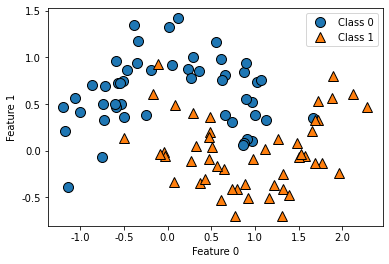

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


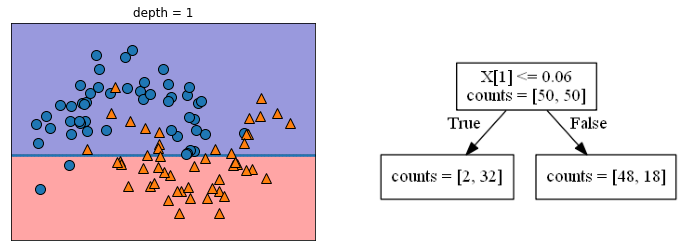

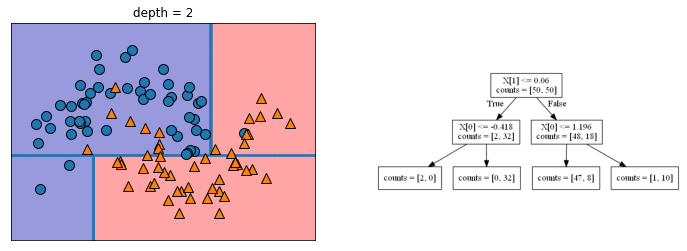

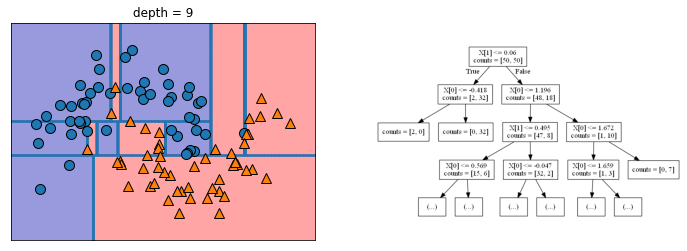

In [5]:
mglearn.plots.plot_tree_progressive()

### 결정 트리의 복잡도 제어하기

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때 까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됩니다.
과대적합을 막는 전략은 크게 두가지 입니다.
1. 트리 생성을 일찍 중단하는 전략
2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다. 그래서 가지치기를 하는 행동이 필요합니다

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Malignant", "benign"],
                feature_names=cancer["feature_names"], impurity=False, filled=True)

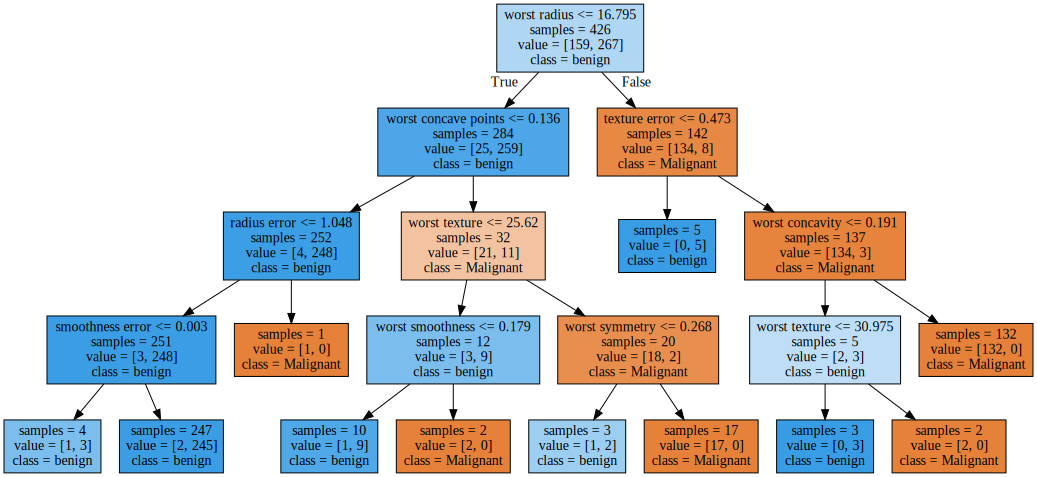

In [9]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

이 값은 0과 1 사이의 숫자로 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다. 특성 중요도의 전체 합은 1입니다.

In [10]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


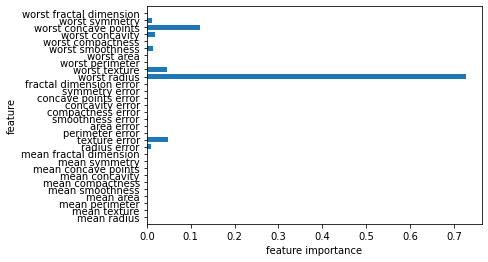

In [12]:
# 특성 중요도 시각화
def plot_feature_importances_cancer(model):
    n_features = cancer['data'].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


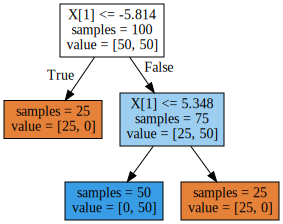

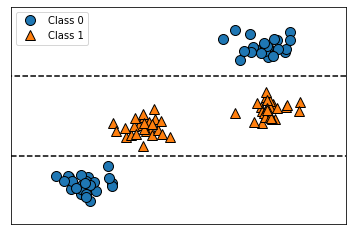

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

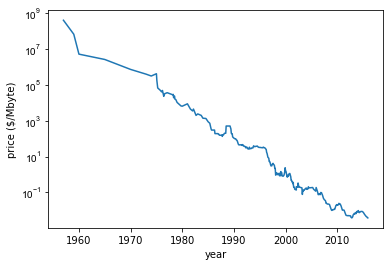

In [14]:
# 컴퓨터 메모리 가격 동향 데이터셋

import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

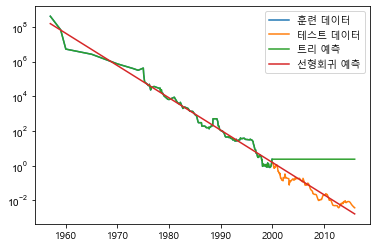

In [77]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show()

트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없습니다. 이는 모든 트리 기반 모델의 공통된 단점입니다.


### 장단점과 매개변수

결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수입니다. max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분합니다.

장점 1. 만들어진 모델을 시각화할 수 있어서 비전문가도 이해하기 쉽다.
장점 2. 데이터의 스케일에 구애받지 않는다.

단점 1. 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다.



## 2.3.6 결정 트리의 앙상블


### 랜던 포레스트

구축을 위해서는 생성할 트리의 개수를 정해야 합니다. 트리를 만들기 위해서 먼저 데이터의 부트스트랩 샘플을 생성합니다.
부트스트랩 샘플링은 랜던 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 합니다. 이 방식에서 핵심 매개변수는  max_features입니다. max_features값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것입니다.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # 만들어진 트리는 estimators_ 속성에 저장
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

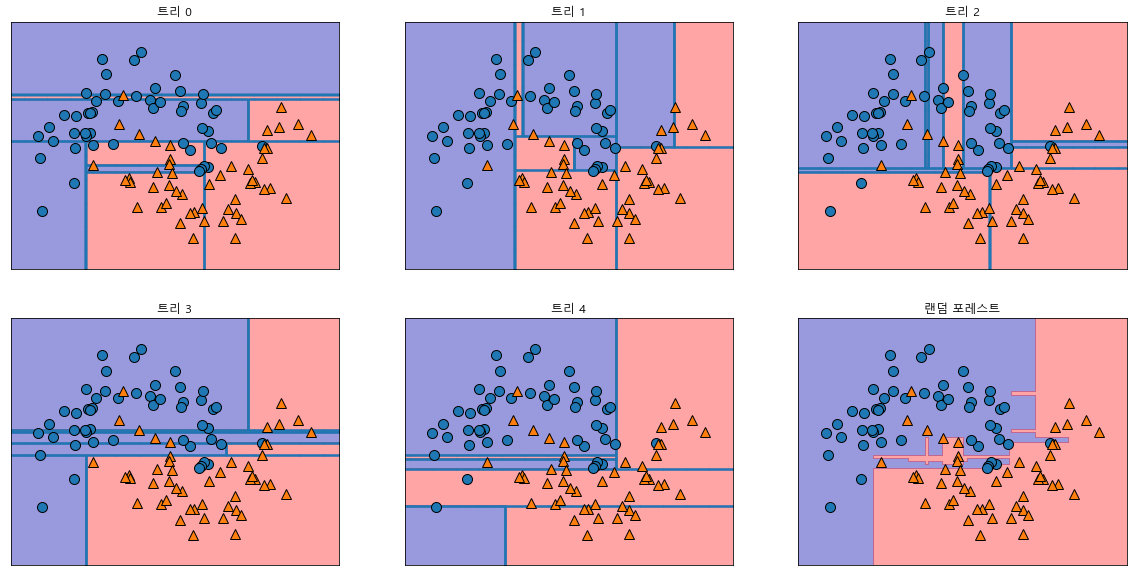

In [80]:
# 시각화

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [19]:
# 유방암 데이터 셋에 100개 트리로 이뤄진 랜덤 포레스트 적용

X_train, X_test, y_train, y_test = train_test_split(
cancer['data'], cancer['target'], random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


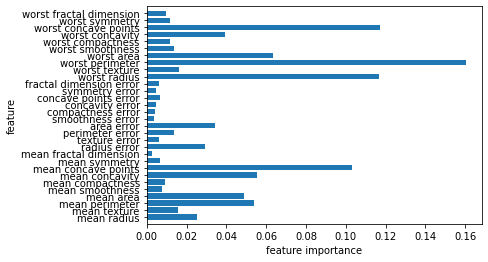

In [20]:
plot_feature_importances_cancer(forest)

### 장단점과 매개변수

랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘입니다. 기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있습니다. 

주의해야할 점은 random_state를 지정하지 않으면 매번 다른 모델이 만들어집니다. 만약 같은 결과를 만들어야 한다면 값을 고정해야 합니다.

랜던 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않습니다. 이런 데이터에는 선형 모델이 더 적합합니다.

n_estimators는 클수록 좋습니다. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만듭니다.


### 그레이디언트 부스팅 회귀 트리

그레이디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법입니다. 이름이 회귀지만 이 모델은 회귀와 분류 모두에 사용할 수 있습니다. 이 모델이는 무작위성이 없습니다. 대신 강력한 사전 가지치기가 사용됩니다.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
cancer['data'], cancer['target'], random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))  # 과대 적합
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [24]:
# 과대적합 줄이기

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
print("---------------------------------------")
print("---------------------------------------")

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
---------------------------------------
---------------------------------------
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


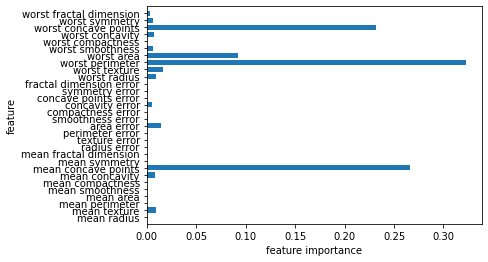

In [25]:
# 시각화

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 장단점과 매개변수

가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것이다. 랜덤 포레스트와 달리 n_estimators를 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아집니다. 가용 가능한 한도내에서 n_estimators를 설정하고 적절한 learning_rate를 찾는 것이 중요하다.

## 2.3.7 배깅, 엑스트라 트리, 에이다부스트

In [41]:
# 예제 데이터셋 만들기
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=42)

### 배깅

배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련세트를 사용하여 분류기를 각기 다르게 학습시킵니다.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True, n_jobs=1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=1, oob_score=True, random_state=42)

In [49]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.944
테스트 세트 정확도: 0.972
OOB 샘플의 정확도: 0.939


In [59]:
# 결정 트리로 배깅을 적용해보자
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            oob_score=True, n_jobs=1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=1, oob_score=True, random_state=42)

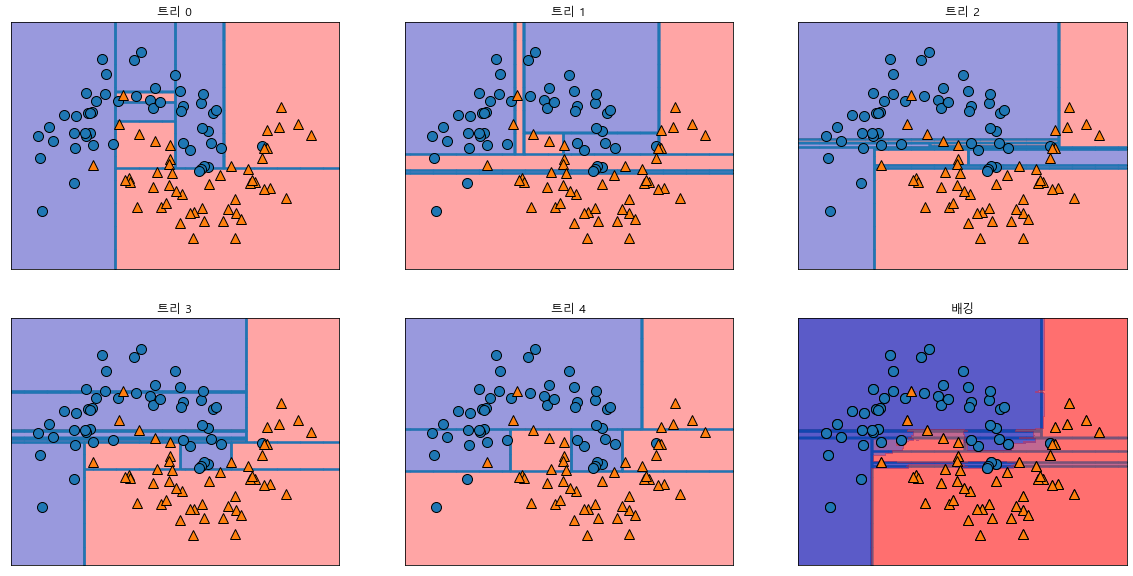

In [65]:
# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

### 엑스트라 트리

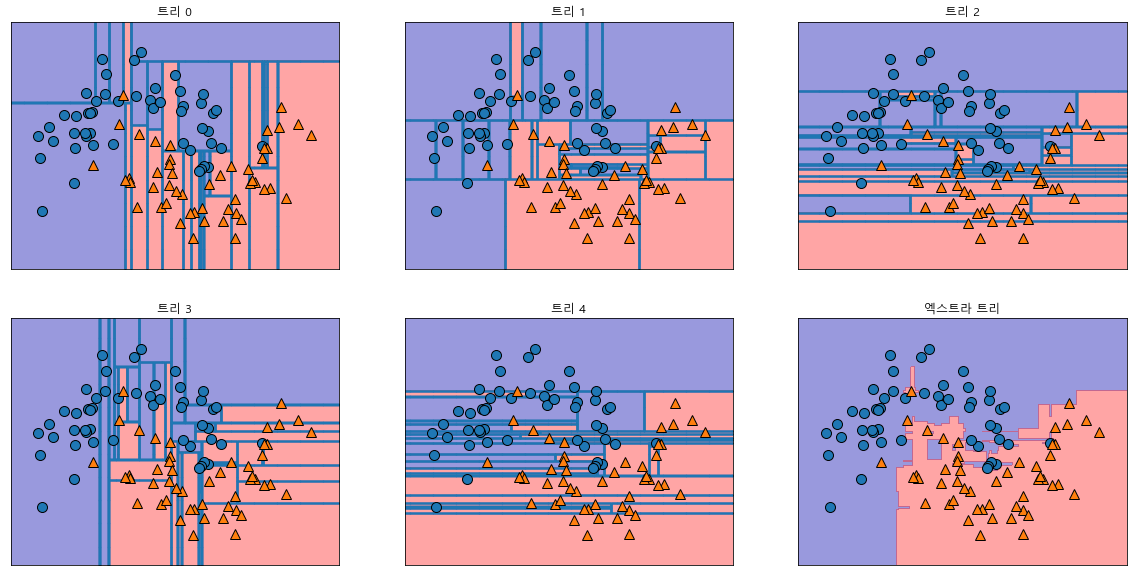

In [68]:
# 결정 트리로 배깅을 적용해보자
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [69]:
# ExtraTreesClassifier 트리 개수를 100으로 지정해서 cancer 데이터셋 적용

xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.979


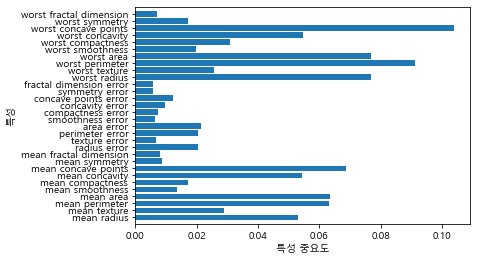

In [70]:
n_features = cancer['data'].shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

### 에이다부트스

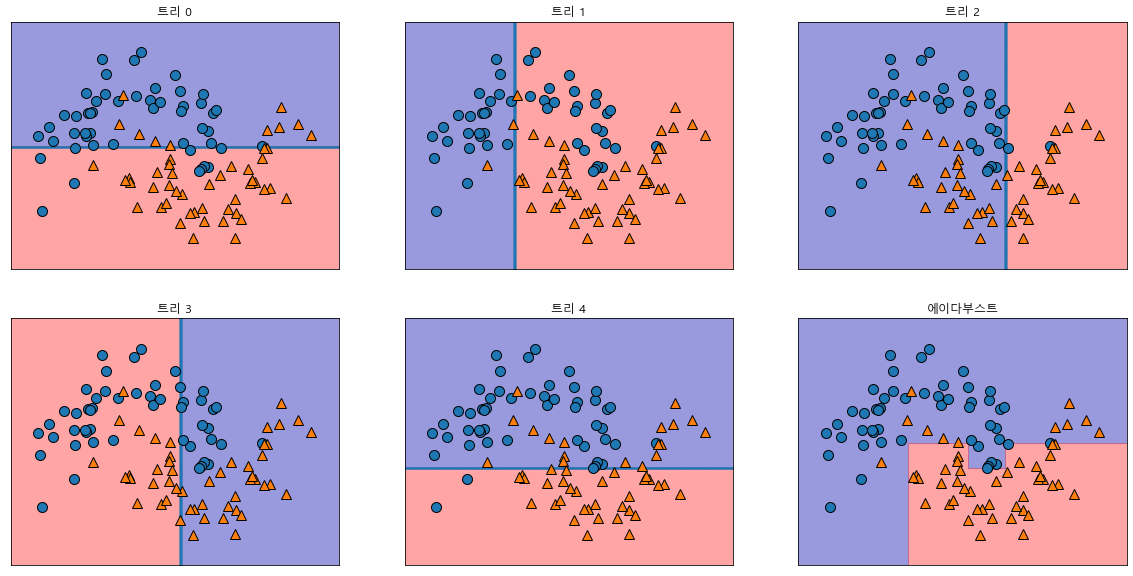

In [73]:
# 결정 트리로 배깅을 적용해보자
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [75]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print("훈련 세트 정확도: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.944


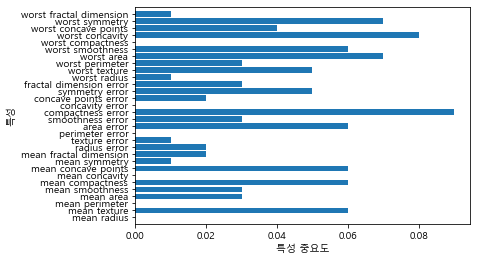

In [76]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성 중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()